<h1><Center>Historical VAR</Center></h1>

Suppose a bank holds a portfolio of various assets, including stocks and bonds. The bank wants to calculate the one-day VaR for this portfolio at a 95% confidence level. This means that the bank wants to estimate the maximum potential loss over the next day with 95% confidence.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Historical_VAR.csv',names=['Date', 'Asset 1', 'Asset 1 return (%)'],skiprows=1)

In [10]:
df.columns

Index(['Date', 'Asset 1', 'Asset 1 return (%)'], dtype='object')

In [12]:
df['Rank'] = np.arange(1,253)

In [39]:
df

,Date,Asset 1,Asset 1 return (%),Rank
0,03-01-2019,142.19,-9.9607,1
1,02-11-2018,207.48,-6.6331,2
2,12-11-2018,194.17,-5.0374,3
3,20-11-2018,176.98,-4.7778,4
4,10-10-2018,216.36,-4.6326,5
...,...,...,...,...
247,02-05-2018,176.57,4.4175,248
248,26-03-2018,172.77,4.7472,249
249,01-08-2018,201.50,5.8910,250
250,30-01-2019,165.25,6.8335,251


### Data Preprocessing

In [15]:
df['Asset 1 return (%)'] = df['Asset 1 return (%)'].str.replace('%', '')

In [21]:
df['Asset 1 return (%)'] = pd.to_numeric(df['Asset 1 return (%)'])

In [22]:
df

,Date,Asset 1,Asset 1 return (%),Rank
0,03-01-2019,142.19,-9.9607,1
1,02-11-2018,207.48,-6.6331,2
2,12-11-2018,194.17,-5.0374,3
3,20-11-2018,176.98,-4.7778,4
4,10-10-2018,216.36,-4.6326,5
...,...,...,...,...
247,02-05-2018,176.57,4.4175,248
248,26-03-2018,172.77,4.7472,249
249,01-08-2018,201.50,5.8910,250
250,30-01-2019,165.25,6.8335,251


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                252 non-null    object 
 1   Asset 1             252 non-null    float64
 2   Asset 1 return (%)  252 non-null    float64
 3   Rank                252 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 8.0+ KB


# Statistics
Total number of returns = 252 

Confidence Level = 95%

Alpha (Level of Significance) = 5%

### Historic VaR is at position

In [47]:
historic_var = 252 * 0.05
historic_var

12.600000000000001

### Historic VaR is at position (rounded)

In [51]:
round(historic_var)

13

Text(0, 0.5, 'Labels')

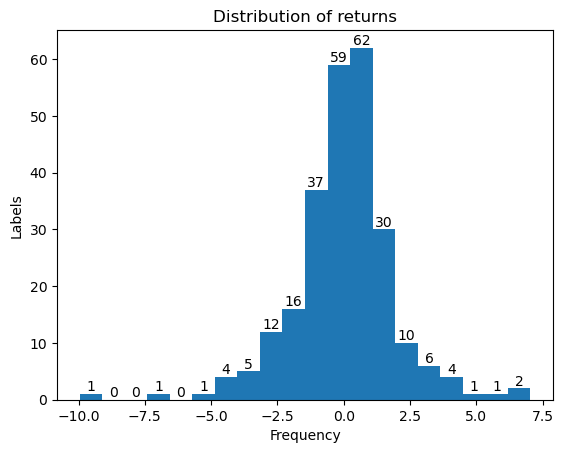

In [61]:
counts, edges, bars = plt.hist(df['Asset 1 return (%)'],bins=20)
plt.bar_label(bars)
plt.title("Distribution of returns")
plt.xlabel("Frequency")
plt.ylabel("Labels")

### Value of my asset (INR)

In [64]:
voa = 1000000
voa

1000000

### VaR amount (INR)

In [76]:
df.iloc[12,2]

-3.1192

In [79]:
(voa * df.iloc[12,2])/100

-31192.0

At a 95% confidence interval, the lower tail displays the lowest 5% of the underlying distribution's returns. For this distribution, the value associated with a 95% confidence interval is a return of -3.1192%. If a bank has invested INR 1,000,000 in this asset , one day VaR is INR 31,191.7 (-3.1192*1000000)